# Tracking My Fitness Journey: Analyzing Body Metrics for a Healthier Life
## By: Dor Bazdtni

### Description:

This project documents my personal journey toward achieving a healthier lifestyle by monitoring key body metrics such as weight, muscle mass, body fat percentage, and BMI. The data-driven approach provides insights into how my exercise routines and dietary changes impact my progress over time.

I started on this journey after receiving a bad blood test result, which prompted me to switch to a healthier diet and increase my physical activity. By analyzing my body measurements and tracking trends, I aim to maintain my progress, refine my fitness strategy, and achieve a sustainable and healthier life.

## <u>Assumptions and clarifying what I did to ensure that my  progress is tracked systematically, providing a strong foundation for meaningful analysis:

<u><b>1.Measurement Consistency:
    
I took all measurements using the <U>same machine</u> on the first day of each month to ensure that I don't add any noise or inconsistencies to the data.

<u><b>2.Diet Plan:
    
Since I first started working out, my diet has changed and follows these rules:

    *No fried foods or sweets.
    *Around 2000 calories a day.
    *Two cheat meals a week.
    *Eating 120 grams of protein per day.

<u><b>3.Workout Routine:
    
My "All body" workout remains consistent and includes:

    *3-4 workout sessions per week.
    *66-75 minutes of muscle-strengthening exercises.
    *25-44 minutes of cardio.

## Importing the libraries:

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Loading the data:

In [2]:
# Load the Excel file
file_path = 'GYM.csv'
gym_df = pd.read_csv(file_path)

gym_df

,Date,Workout_type,Weight(KG),Muscle_mass_(KG),Body_fat(%),BMI
0,1.11.23,All body,102.6,37.8,34.4,30.64
1,1.12.23,All body,101.2,38.4,32.2,30.22
2,1.1.24,All body,99.3,39.1,30.9,29.65
3,1.2.24,All body,97.6,39.8,29.2,29.14
4,1.3.24,All body,95.2,40.2,25.9,28.43
5,1.4.24,All body,93.9,40.7,24.3,28.04
6,1.5.24,All body,91.2,40.8,22.1,27.23


# Exploratory Data Analysis (EDA):

<u><b>Let's first look at the 3 main measurements Weight (KG), Muscle Mass (KG), and Body Fat (%) trend over time:

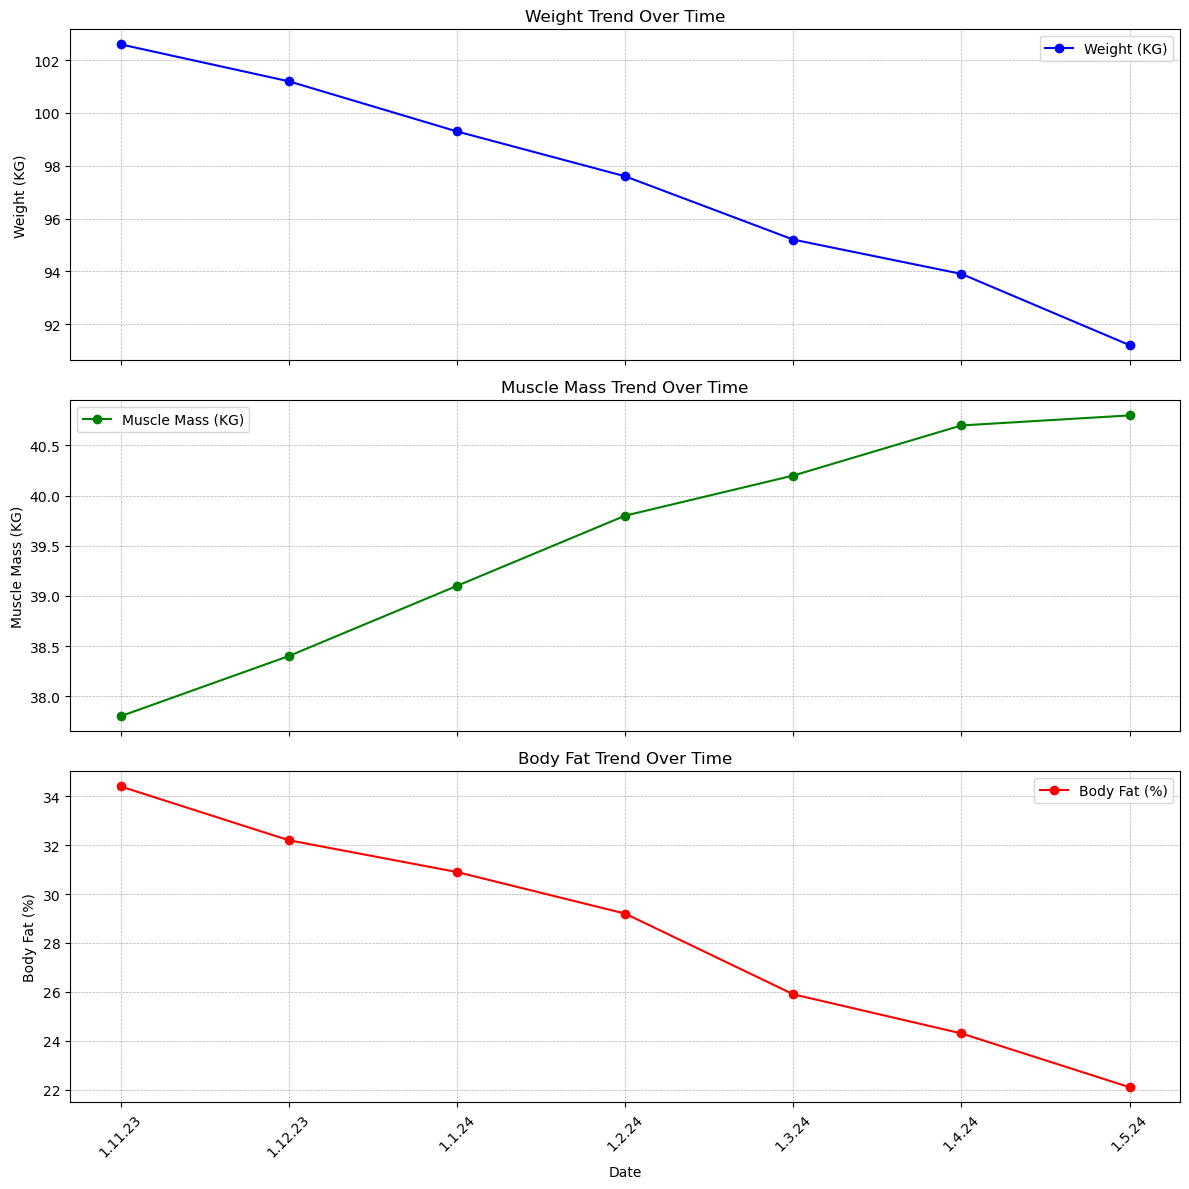

In [3]:
# Set up a figure with three subplots for separate measurements
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Weight (KG)
axs[0].plot(gym_df['Date'], gym_df['Weight(KG)'], label='Weight (KG)', marker='o', color='blue')
axs[0].set_ylabel('Weight (KG)')
axs[0].set_title('Weight Trend Over Time')
axs[0].grid(visible=True, linestyle='--', linewidth=0.5)
axs[0].legend()

# Plot Muscle Mass (KG)
axs[1].plot(gym_df['Date'], gym_df['Muscle_mass_(KG)'], label='Muscle Mass (KG)', marker='o', color='green')
axs[1].set_ylabel('Muscle Mass (KG)')
axs[1].set_title('Muscle Mass Trend Over Time')
axs[1].grid(visible=True, linestyle='--', linewidth=0.5)
axs[1].legend()

# Plot Body Fat (%)
axs[2].plot(gym_df['Date'], gym_df['Body_fat(%)'], label='Body Fat (%)', marker='o', color='red')
axs[2].set_ylabel('Body Fat (%)')
axs[2].set_title('Body Fat Trend Over Time')
axs[2].grid(visible=True, linestyle='--', linewidth=0.5)
axs[2].legend()

# Configure common elements
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



By looking at the 3 graphs above I can say:

<u><b>Weight (KG):
    
The weight shows a consistent downward trend, indicating successful weight loss over the period. This suggests that my combination of diet and exercise is helping to reduce overall body weight.

<u><b>Muscle Mass (KG):
    
The muscle mass shows a generally increasing trend, with a few fluctuations. This indicates that the workouts are effective in building or preserving muscle while I'm losing weight.

<u><b>Body Fat (%):
    
The body fat percentage follows a steady decline, suggesting a reduction in overall fat content. This aligns with the drop in weight and the rise in muscle mass, implying a favorable body composition change.

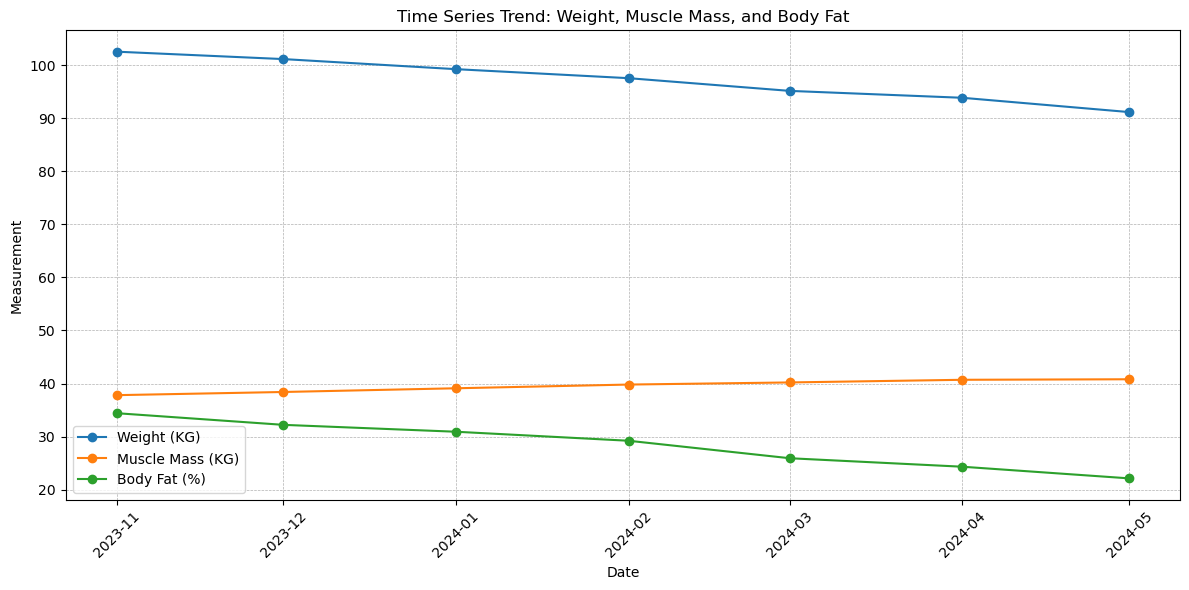

In [4]:
# Convert the 'Date' column to a proper datetime format
gym_df['Date'] = pd.to_datetime(gym_df['Date'], format='%d.%m.%y')

# Plot trends over time for weight, muscle mass, and body fat
plt.figure(figsize=(12, 6))

# Plot Weight
plt.plot(gym_df['Date'], gym_df['Weight(KG)'], label='Weight (KG)', marker='o')
# Plot Muscle Mass
plt.plot(gym_df['Date'], gym_df['Muscle_mass_(KG)'], label='Muscle Mass (KG)', marker='o')
# Plot Body Fat
plt.plot(gym_df['Date'], gym_df['Body_fat(%)'], label='Body Fat (%)', marker='o')

plt.xlabel('Date')
plt.ylabel('Measurement')
plt.title('Time Series Trend: Weight, Muscle Mass, and Body Fat')
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



The combined data shows that my approach is leading to <u>healthier outcomes</u>. I'm losing weight, reducing body fat, and increasing muscle mass, which are all positive signs of improved fitness. The fluctuations in the trends may reflect changes in workout intensity or dietary adjustments, which are natural over time.

### <u> BMI 

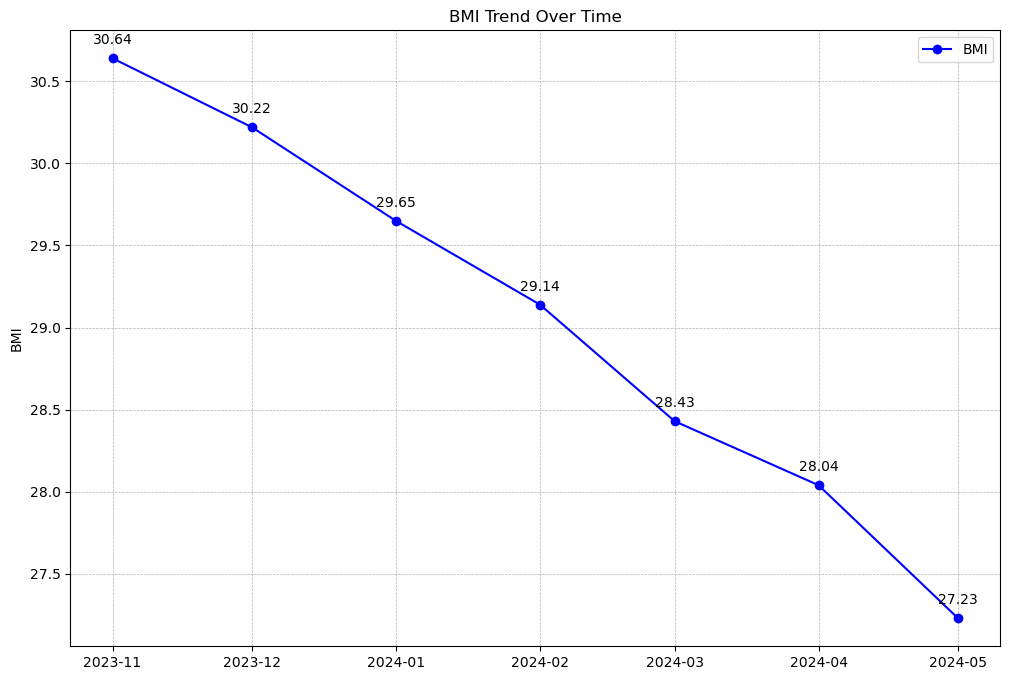

In [9]:
# Set up a figure with one subplot for BMI
fig, axs = plt.subplots(1, 1, figsize=(12, 8))

# Plot BMI
axs.plot(gym_df['Date'], gym_df['BMI'], label='BMI', marker='o', color='blue')

# Annotate each data point with its BMI value
for i, txt in enumerate(gym_df['BMI']):
    axs.annotate(f'{txt:.2f}', (gym_df['Date'][i], gym_df['BMI'][i]), textcoords="offset points", xytext=(0,10), ha='center')

axs.set_ylabel('BMI')
axs.set_title('BMI Trend Over Time')
axs.grid(visible=True, linestyle='--', linewidth=0.5)
axs.legend()

plt.show()


#### <u>From the BMI trend graph above I can learn:

<b>Consistent Decline:</b>

My BMI shows a steady decrease from 30.64 in November to 27.23 in May. This means that I have successfully moved out of the obese category, achieving progress toward a healthier weight.

<b>Category Changes:</b>
    
I started at a BMI of 30.64, which placed me in the "Obese" category.
    
By reducing my BMI to 29.65, I moved into the "Overweight" range.
    
The decline to 27.23 shows that I remain in the "Overweight" category but have significantly reduced the gap toward reaching the "Normal weight" range.
    
This decline demonstrates the effectiveness of my current workout and dietary regimen. I will continue monitoring my progress to reach the "Normal weight" category for improved overall health.

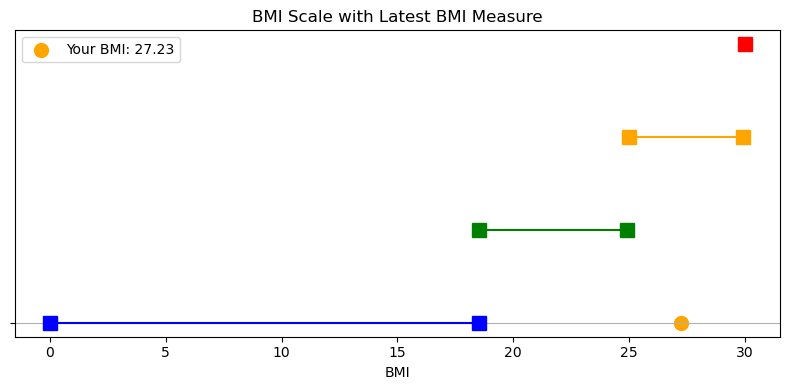

In [6]:
# Latest BMI
bmi_data = list(gym_df['BMI'])[-1]
bmi_data = "{:.2f}".format(bmi_data)

# Define BMI classification ranges and categories
bmi_ranges = {'Underweight': (0, 18.5), 'Normal weight': (18.5, 24.9), 'Overweight': (25, 29.9), 'Obesity': (30, float('inf'))}

# Get the range of the latest BMI value
color_map = {'Underweight': 'blue', 'Normal weight': 'green', 'Overweight': 'orange', 'Obesity': 'red'}
bmi_color = next(color_map[category] for category, (lower, upper) in bmi_ranges.items() if lower < float(bmi_data) <= upper)

# Plotting
plt.figure(figsize=(8, 4))
[plt.plot([lower, upper], [i, i], marker='s', color=color, markersize=10) for i, ((lower, upper), color) in enumerate(zip(bmi_ranges.values(), ['blue', 'green', 'orange', 'red']))]
plt.scatter(float(bmi_data), 0, color=bmi_color, marker='o', s=100, label=f'Your BMI: {bmi_data}')
plt.title('BMI Scale with Latest BMI Measure')
plt.xlabel('BMI')
plt.yticks([0], [''])  # Remove y-axis labels
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


The graph above shows the latest BMI up until 01.05.2024 measurement against the standard BMI categories. 

<b><u>Here's what I see:

<b>BMI Categories:
    
Underweight (blue, square): BMI less than 18.5
    
Normal weight (green, square): BMI from 18.5 to 24.9
    
Overweight (orange, square): BMI from 25 to 29.9
    
Obese (red, square): BMI of 30 and above

<b>Current Status:
    
The orange circle on the graph represents my latest BMI of 27.23.
    
This value places me in the "Overweight" category, which ranges from 25 to 29.9.
    
<b>Progress Toward Normal Weight:
    
My BMI is within the "Overweight" category but is moving closer to the "Normal weight" range (18.5 to 24.9).

# Corralations

### <u>Pearson and Spearman Correlations between the measurements:

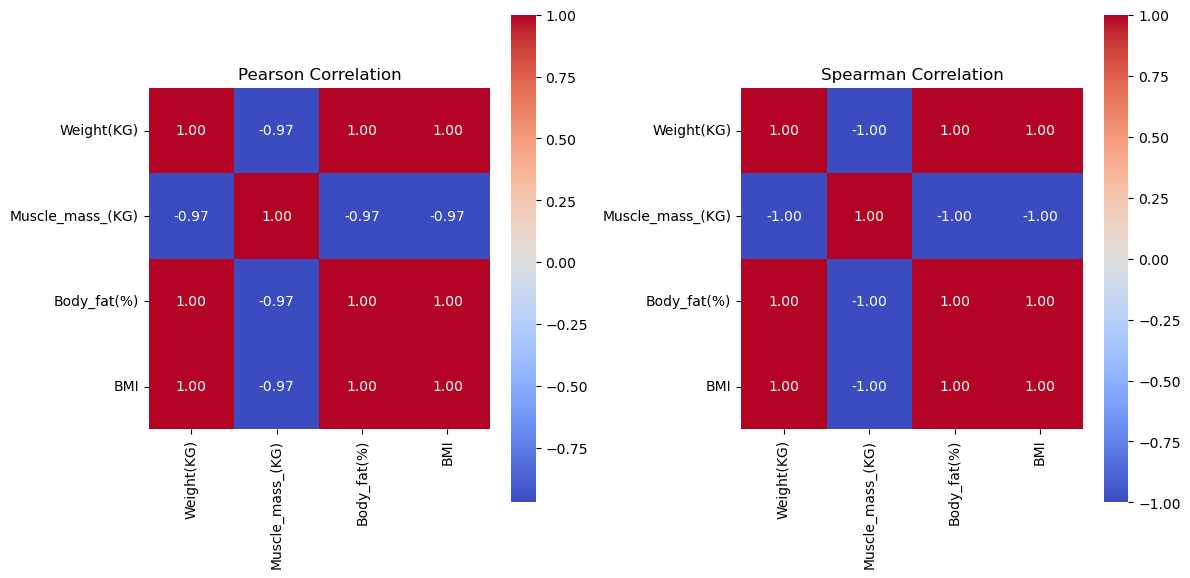

In [7]:
# Calculate Pearson correlation matrix
pearson_correlation_matrix = gym_df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_correlation_matrix = gym_df.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot Pearson correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation')

# Plot Spearman correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()

<b><u>The correlation matrices above suggest strong correlations between the variables. Here's a breakdown:

<u>Pearson Correlation Matrix:
    
Weight(KG) and BMI have a correlation coefficient of 1, indicating a perfect positive correlation.
Muscle_mass_(KG) and Body_fat(%) have a correlation coefficient of -0.970827, suggesting a very strong negative correlation.
    
Weight(KG) and Body_fat(%) have a correlation coefficient of 0.996300, indicating a very strong positive correlation.
    
<u>Spearman Correlation Matrix:
    
Weight(KG), Muscle_mass_(KG), Body_fat(%), and BMI all exhibit a perfect negative correlation with each other (-1).
    
<b><u>Analyzing this information:
  
<u>Weight and BMI:
    
Since weight and BMI have a perfect positive correlation, efforts to reduce weight will likely lead to a decrease in BMI.
    
<u> Muscle Mass and Body Fat Percentage:
    
The strong negative correlation between muscle mass and body fat percentage implies that as muscle mass increases, body fat percentage tends to decrease, and vice versa. To gain muscle mass while reducing body fat, like I decided to focus on resistance training exercises combined with a balanced diet that provides adequate protein and controlled calorie intake.
    
<u> Weight and Body Fat Percentage:
    
The very strong positive correlation between weight and body fat percentage suggests that as weight increases, body fat percentage tends to increase as well. 

### Predicting the Weight and BMI

thi is an explanation for the code below:

<u>Data Splitting:
    
Split the dataset into 80% training and 20% testing subsets.

<u>Weight Model:
    
Train an Exponential Smoothing model on the training weight data.
Forecast weight values for the test period and evaluate the model using MAE, MSE, and RMSE.
Predict future weight values and calculate the number of months needed to reach 83 kg.

<U>BMI Model:
    
Train an Exponential Smoothing model on the training BMI data.
Forecast BMI values for the test period and evaluate the model using MAE, MSE, and RMSE.
Predict future BMI values and determine the number of months required to reach a BMI of 24.

<u>Results and Predictions:
    
Print the MAE, MSE, and RMSE for both models to assess their accuracy.
Report how many months it will take to reach 83 kg and a BMI of 24 from May 2024.

In [35]:
import numpy as np

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(gym_df))
train, test = gym_df.iloc[:train_size], gym_df.iloc[train_size:]

# Weight model trained on training data
weight_model = ExponentialSmoothing(train['Weight(KG)'], trend='add', seasonal=None).fit()
weight_forecast = weight_model.forecast(len(test))

# Calculate MAE, MSE, RMSE for Weight
mae_weight = mean_absolute_error(test['Weight(KG)'], weight_forecast)
mse_weight = mean_squared_error(test['Weight(KG)'], weight_forecast)
rmse_weight = np.sqrt(mse_weight)

# Forecast future weight values after the test period
weight_future_forecast = weight_model.forecast(12)
weight_target = 83
weight_reach_date = len(weight_future_forecast[weight_future_forecast >= weight_target])


# BMI model trained on training data
bmi_model = ExponentialSmoothing(train['BMI'], trend='add', seasonal=None).fit()
bmi_forecast = bmi_model.forecast(len(test))

# Calculate MAE, MSE, RMSE for BMI
mae_bmi = mean_absolute_error(test['BMI'], bmi_forecast)
mse_bmi = mean_squared_error(test['BMI'], bmi_forecast)
rmse_bmi = np.sqrt(mse_bmi)

# Forecast future BMI values after the test period
bmi_future_forecast = bmi_model.forecast(12)
bmi_target = 24
bmi_reach_date = len(bmi_future_forecast[bmi_future_forecast <= bmi_target])


# Return the error metrics and prediction dates
print(f"The MAE of weight model is: {mae_weight:.3f}")
print(f"The MSE of weight model is: {mse_weight:.3f}")
print(f"The RMSE of weight model is: {rmse_weight:.3f}")
print(f"The MAE of BMI model is: {mae_bmi:.3f}")
print(f"The MSE of weight model is: {mse_bmi:.3f}")
print(f"The RMSE of weight model is: {rmse_bmi:.3f}")

print(f"I will reach 83 KG after {weight_reach_date} months since May 2024")
print(f"I will reach 24 BMI after {bmi_reach_date} months since May 2024")


The MAE of weight model is: 0.430
The MSE of weight model is: 0.221
The RMSE of weight model is: 0.470
The MAE of BMI model is: 0.130
The MSE of weight model is: 0.020
The RMSE of weight model is: 0.142
I will reach 83 KG after 6 months since May 2024
I will reach 24 BMI after 4 months since May 2024


Here's an analysis of the results:

<u>1. **Weight Model Performance**:
   - **Mean Absolute Error (MAE)**: 0.430
   - **Mean Squared Error (MSE)**: 0.221
   - **Root Mean Squared Error (RMSE)**: 0.470

   These relatively low error values indicate that the weight model is accurately forecasting weight changes. The RMSE of 0.470 shows that, on average, the predicted weights are within 0.47 kg of the actual values.

<u>2. **BMI Model Performance**:
   - **Mean Absolute Error (MAE)**: 0.130
   - **Mean Squared Error (MSE)**: 0.020
   - **Root Mean Squared Error (RMSE)**: 0.142

   The BMI model also has low error metrics, meaning the predictions are generally accurate. An RMSE of 0.142 means that the predicted BMI values are within an average deviation of 0.142 points from the actual BMIs.

<u>3. **Time to Reach Targets**:
   - **Weight (83 kg)**: You will likely reach a weight of 83 kg after 6 months from May 2024, which means November 2024.
   - **BMI (24)**: The forecast indicates that you will achieve a BMI of 24 after 4 months from May 2024, which means September 2024.

<u>**Overall Analysis**:
    
The forecasting models predict that your weight and BMI will reach their target levels within a reasonable timeframe based on current trends. However, predictions are estimates and subject to variation due to factors like changes in diet or exercise routines. Monitoring progress regularly can help refine these targets.

# Evaluate whether to continue with the same workout type.

## Smallest changes in muscle mass

I want to explore periods of the smallest changes in muscle mass because they can indicate a <b><u>plateau in my progress</u></b>. Understanding these periods will help me identify when to adjust my workout type or increase my protein intake to continue building muscle effectively.

To identify <b><u>periods of the smallest changes in muscle mass</u></b>, I want to analyze the differences between consecutive muscle mass measurements. By plotting these changes, I can spot the points with the least improvement, helping me decide when to change my workout type or increase the amount of protein I eat each day.

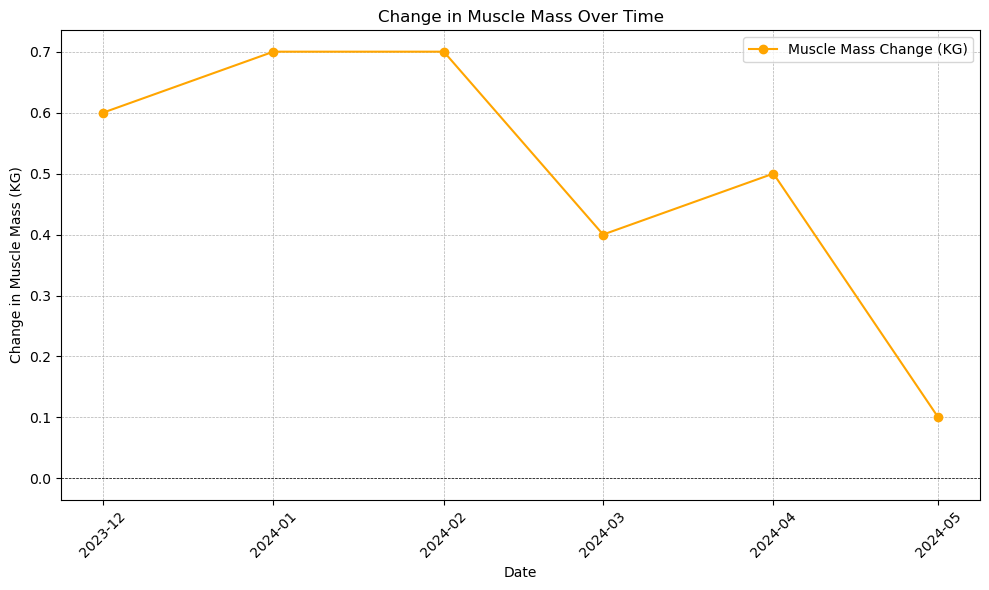

In [8]:
# Calculate the difference in muscle mass between consecutive measurements
gym_df['Muscle_mass_change'] = gym_df['Muscle_mass_(KG)'].diff()

# Plot the change in muscle mass over time
plt.figure(figsize=(10, 6))
plt.plot(gym_df['Date'], gym_df['Muscle_mass_change'], marker='o', color='orange', label='Muscle Mass Change (KG)')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Change in Muscle Mass (KG)')
plt.title('Change in Muscle Mass Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



Graph explation:

This graph illustrates changes in muscle mass between consecutive measurements over time:

Positive values indicate an increase in muscle mass compared to the previous measurement.

Negative values represent a decrease in muscle mass.

The smallest positive changes or negative changes could indicate periods where muscle growth slowed or muscle mass decreased.

<b><u> Result:
    
The smallest change in muscle mass is in the <b>last measurement in May</b>.
    
I need to switch to a different workout:

    *New AB workout type: More intense on specific muscles and combines cardio with muscle training in one workout.
    *B: Combines cardio and strength training in the same workout.
    *I will increase the protein I eat to 150 grams instead of 120 grams.

## To be continued...

This project is currently in progress, providing valuable insights into my fitness journey through the analysis of weight, BMI, muscle mass, and other key health metrics. By using time series models, I've identified trends that forecast when I'll reach specific health goals. However, the full impact and predictive power of the project will be better understood as I add new data, allowing for continuous refinement and improved accuracy in forecasting future progress.